In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

train = pd.read_csv('data/adult-training.csv', names=columns)
test = pd.read_csv('data/adult-test.csv', names=columns, skiprows=1)

In [3]:
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# Data Exploration

In [5]:
train.shape

(32561, 15)

In [6]:
test.shape


(16281, 15)

#### Understanding Our Features 

In [7]:
train.columns.values

array(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'], dtype=object)

In [8]:
print("{} Numerical columns, {} Categorial columns".format(
    list(train.select_dtypes(include=[np.number]).shape)[1],
    list(train.select_dtypes(include = ['object']).shape)[1]))

6 Numerical columns, 9 Categorial columns


In [9]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Age', 'fnlgwt', 'Education num', 'Capital Gain', 'Capital Loss',
        'Hours/Week'],
       dtype='object'),
 dtype('O'): Index(['Workclass', 'Education', 'Marital Status', 'Occupation',
        'Relationship', 'Race', 'Sex', 'Native country', 'Income'],
       dtype='object')}

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

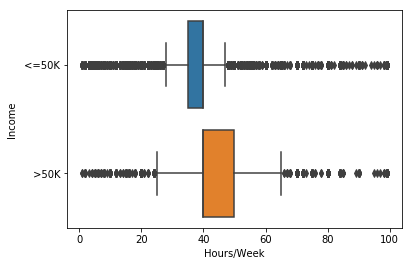

In [11]:
sns.boxplot(x=train['Hours/Week'],y=train['Income'])

In [12]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlgwt            16281 non-null int64
Education         16281 non-null object
Education num     16281 non-null int64
Marital Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours/Week        16281 non-null int64
Native country    16281 non-null object
Income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


# Data Cleaning 

In [14]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)


In [15]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [16]:
test.isnull().sum()


Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

The Features Work Class, Occupation, and Native Country all have missing data. 

# Feature Engineering


array(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'], dtype=object)

Numerical Index(['Age', 'fnlgwt', 'Education num', 'Capital Gain', 'Capital Loss',
        'Hours/Week'],
       dtype='object'),
Categorical Index(['Workclass', 'Education', 'Marital Status', 'Occupation',
        'Relationship', 'Race', 'Sex', 'Native country', 'Income'],
       dtype='object')}

## Target Column

In [17]:
#changes the string ' >50k' to int 1 and ' <=50k' to int 0 
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

## Age

The age of an individual 

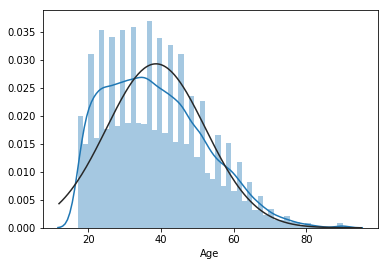

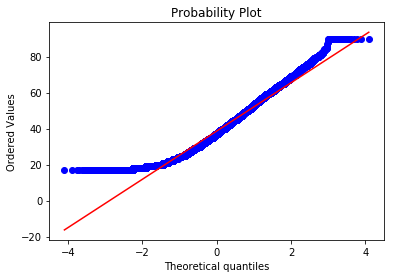

In [18]:
from scipy.stats import norm
from scipy import stats

sns.distplot(train['Age'], fit=norm)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Age'], plot=plt)
plt.show()

Looks like this data is positively skewed. 

In [19]:
train['Age'] = train['Age'].apply(lambda x: np.sqrt(x))
test['Age'] = test['Age'].apply(lambda x: np.sqrt(x))

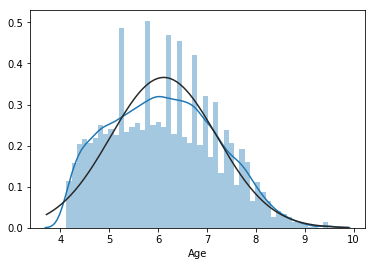

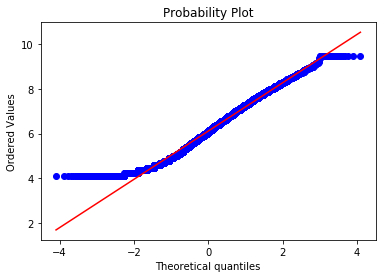

In [20]:
sns.distplot(train['Age'], fit=norm)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Age'], plot=plt)
plt.show()

## Work Class

general term which represents the employment status of individual 

In [21]:
#Since workclass had many missing values lets just replace NaN with 0 to help visualize the data better
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)

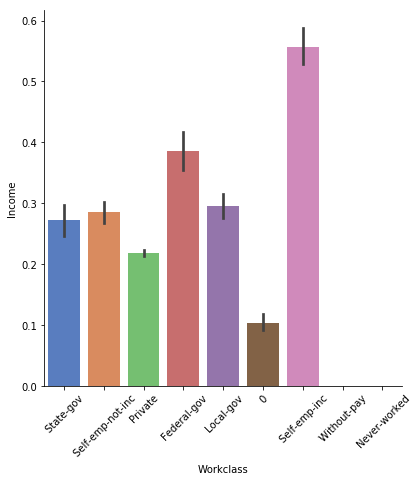

In [22]:
sns.catplot(x="Workclass", y="Income", data=train, kind="bar", height = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [23]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [24]:
#without-pay and never worked look the same
train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

In [25]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: Workclass, dtype: int64

## fnlgwt

fnlwgt​: final weight. this is the number of people the census believes the entry represents.. ○ Integer greater than 0. 



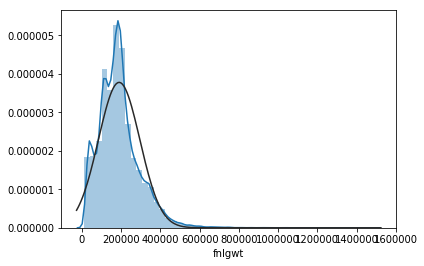

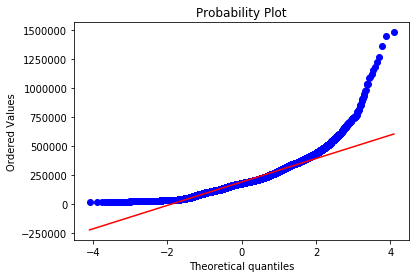

In [26]:
sns.distplot(train['fnlgwt'], fit=norm)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['fnlgwt'], plot=plt)
plt.show()

In [27]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

These values are really large lets fix that

In [28]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

In [29]:
train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

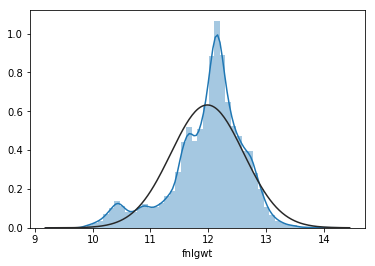

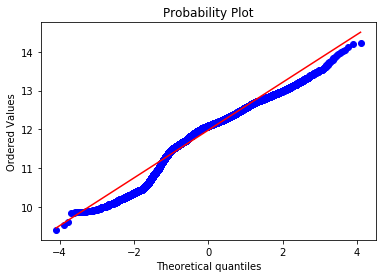

In [30]:
sns.distplot(train['fnlgwt'], fit=norm)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['fnlgwt'], plot=plt)
plt.show()

Looks like the data more closely approximates a normal curve now which will help give more accurate predictions. 

## Education

education level as a string.

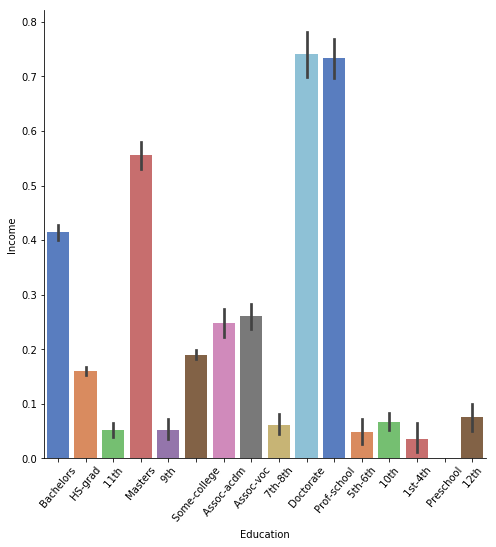

In [31]:
sns.catplot(x='Education',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

In [32]:
train['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [33]:
def non_hs_graduate(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' non-hs-graduate'
    else:
        return x

In [34]:
train['Education'] = train['Education'].apply(non_hs_graduate)
test['Education'] = test['Education'].apply(non_hs_graduate)

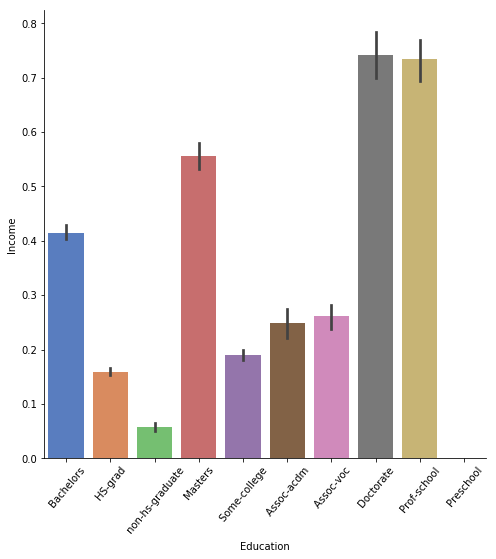

In [35]:
sns.catplot(x='Education',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

## Education Num
numeric representation of the education feature

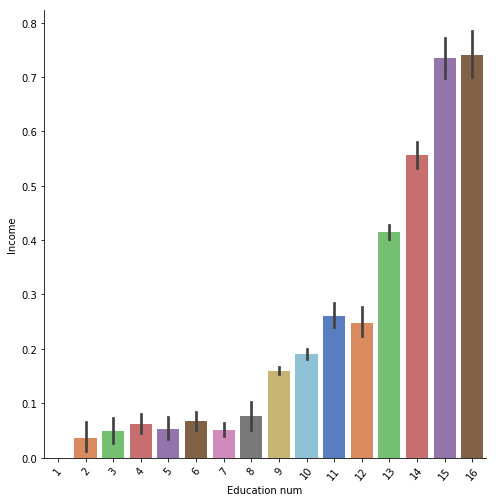

In [36]:
sns.catplot(x='Education num',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

## Marital Status

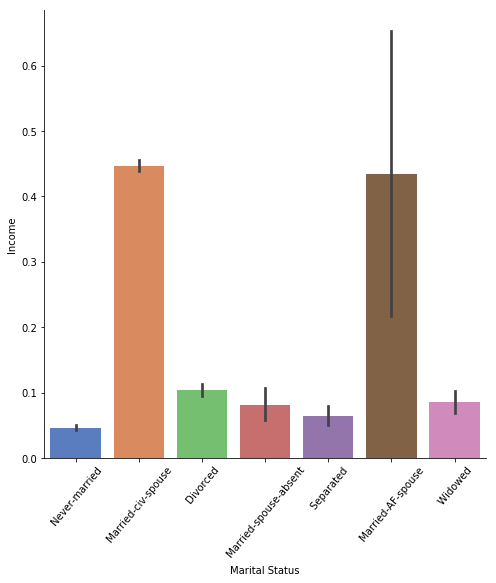

In [37]:
sns.catplot(x='Marital Status',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

In [38]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [39]:
#there are very few married-af-spouses since they are similar to married-civ-spouse lets combine these two categories
#this will reduce collinearity amongst our dummy variables later on
train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

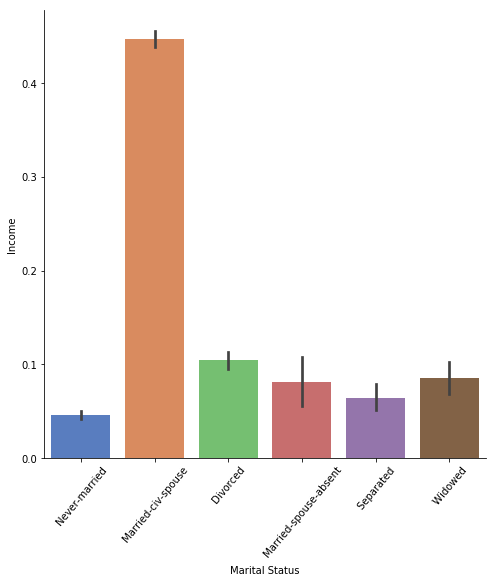

In [40]:
sns.catplot(x='Marital Status',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

## Occupation

Remember this data had missing values

In [41]:
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

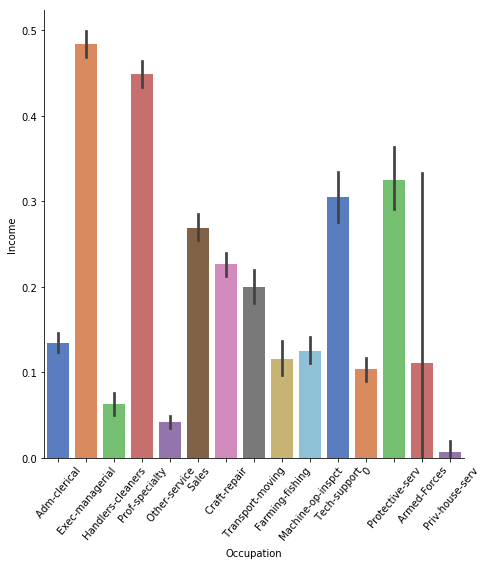

In [42]:
sns.catplot(x='Occupation',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

In [43]:
train['Occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [44]:
#Occupation and zero seem to be really similar lets replace them
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)

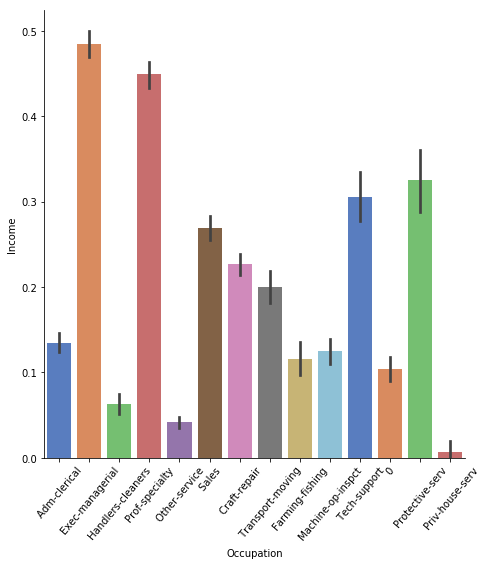

In [45]:
sns.catplot(x='Occupation',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

## Relationship

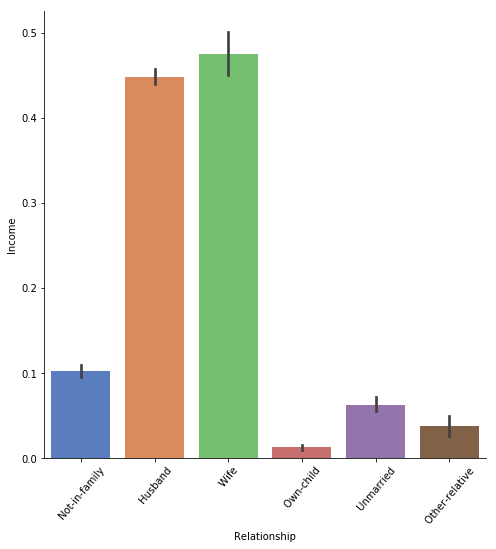

In [46]:
sns.catplot(x='Relationship',y='Income', data=train, kind='bar', height=7, palette ='muted')
plt.xticks(rotation=50);

In [47]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

## Relative

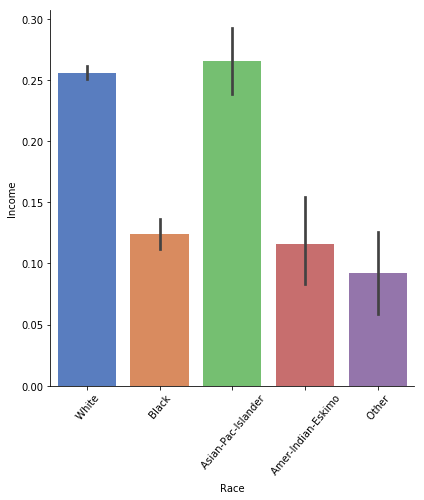

In [48]:
sns.catplot(x='Race',y='Income', data=train, kind='bar', height=6, palette ='muted')
plt.xticks(rotation=50);

In [49]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

## Sex

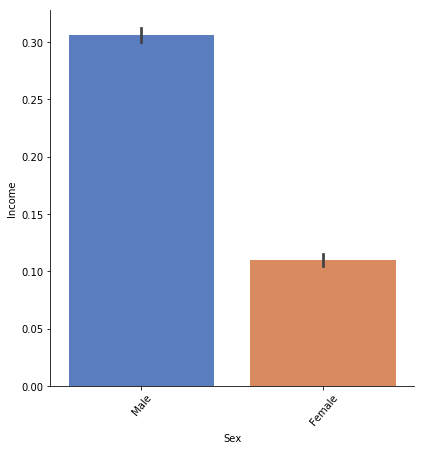

In [50]:
sns.catplot(x='Sex',y='Income', data=train, kind='bar', height=6, palette ='muted')
plt.xticks(rotation=50);

## Native Country 

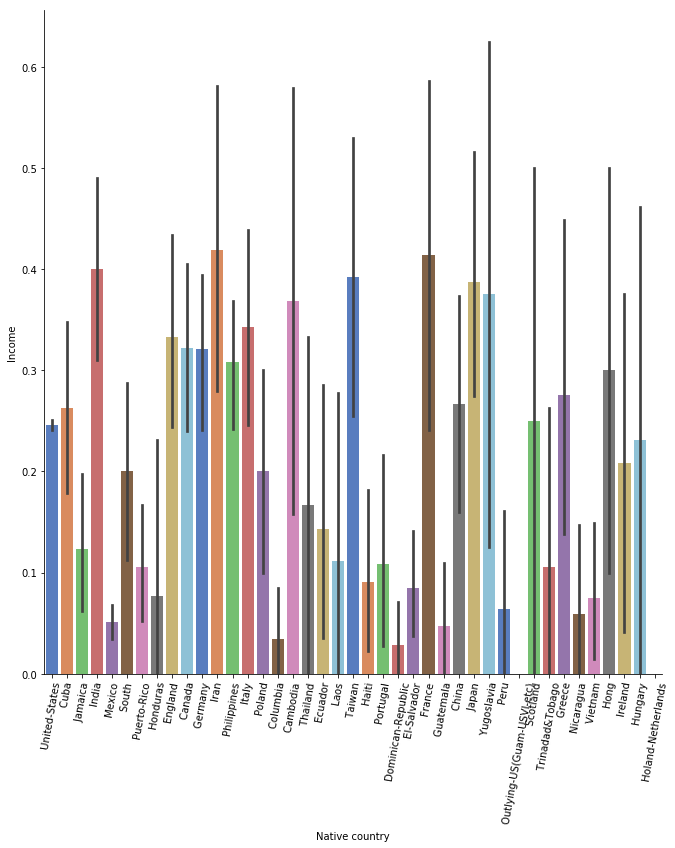

In [51]:
sns.catplot(x='Native country',y='Income', data=train, kind='bar', height=10, palette ='muted')
plt.xticks(rotation=80);

In [52]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'team Thailand'
    
    else: 
        return country    

In [53]:
train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)

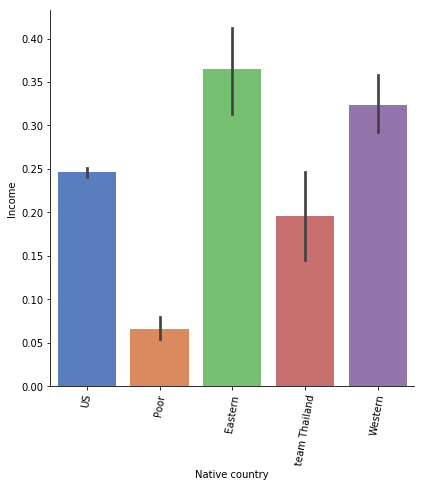

In [54]:
sns.catplot(x='Native country',y='Income', data=train, kind='bar', height=6, palette ='muted')
plt.xticks(rotation=80);

In [55]:
train['Native country'].value_counts()


US               29265
Poor              1415
Western            677
Eastern            386
team Thailand      235
Name: Native country, dtype: int64

# One Hot Encoding 

In [56]:
#merge the datasets
joint = pd.concat([train,test],axis=0)

In [57]:
joint.dtypes

Age               float64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

In [58]:
#list of columns with dtype: object
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 8
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [59]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [60]:
joint.head()


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: 0,Workclass: Federal-gov,Workclass: Local-gov,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poor,Native country:US,Native country:Western,Native country:team Thailand
0,6.244998,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,7.071068,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,6.164414,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,7.280110,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,5.291503,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


now seperate joint back into train test split. 

In [61]:
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

# Machine Learning/Modelling 

## Feature standardization  

divide the data frame into features: Xtrain, Xtest and targets: Ttrain, Ttest. Then standarize features.

In [62]:
from sklearn.preprocessing import StandardScaler

##train set
#feature matrix from train set
Xtrain = train.drop('Income', axis=1)
#target vector from train set
Ttrain = train['Income']

##test set
#feature matrix from test set
Xtest = test.drop('Income', axis=1)
#target vector from test set
Ttest = test['Income']

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

C:\Users\sk8er\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sk8er\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\sk8er\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [64]:
#instantiate the model 
model = LogisticRegression()
model.fit(Xtrain, Ttrain)

#make predictions for the train and test sets 
Ytrain = model.predict(Xtrain)
Ytest = model.predict(Xtest)

In [136]:
model_accuracy = []
def accuracy_score_metric(target_prediction):
    model_accuracy.append(precision_score(Ttest, target_prediction))
    return print('Precision Score:', precision_score(Ttest, target_prediction))

## Logistic Regression: Model Performance on Training Set

In [129]:
#result metrics for training set
print(classification_report(Ttrain, Ytrain))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     24720
           1       0.74      0.61      0.67      7841

   micro avg       0.85      0.85      0.85     32561
   macro avg       0.81      0.77      0.79     32561
weighted avg       0.85      0.85      0.85     32561



## Logistic Regression: Model Performance on Test Set 

In [130]:
from sklearn.metrics import confusion_matrix
#Ttest: actual target data or y_true
#Ytest: predicted values for the test set from the learned model or y_pred
print(confusion_matrix(Ttest,Ytest))

[[11581   854]
 [ 1528  2318]]


In [131]:
#result metrics for test set
print(classification_report(Ttest, Ytest))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [137]:
accuracy_score_metric(Ytest)

Precision Score: 0.7307692307692307


## Neural Network Classifier 

In [121]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(train.shape[1],train.shape[1],train.shape[1]),max_iter=500)


In [122]:
mlp.fit(Xtrain, Ttrain)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(63, 63, 63), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Neural Network: Model Performance on Test Set 

In [123]:
#neural network classifier model predictions
#predictions for the test set by our nn classifier model 
T_pred = mlp.predict(Xtest)

print(confusion_matrix(Ttest,T_pred))

[[10973  1462]
 [ 1561  2285]]


In [124]:
#result metrics for test set with nn classifier model 
print(classification_report(Ttest, T_pred))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12435
           1       0.61      0.59      0.60      3846

   micro avg       0.81      0.81      0.81     16281
   macro avg       0.74      0.74      0.74     16281
weighted avg       0.81      0.81      0.81     16281



In [138]:
accuracy_score_metric(T_pred)



Precision Score: 0.6098211902855618


## Support Vector Machine Classifier

In [75]:
from sklearn import svm

#Create a svm Classifier
svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm.fit(Xtrain, Ttrain)

#Predict the response for test dataset
T_pred_SVM = svm.predict(Xtest)

## Support Vector Machine: Model Performance on Test Set 

In [76]:
print(confusion_matrix(Ttest,T_pred_SVM))

[[11648   787]
 [ 1608  2238]]


In [77]:
#result metrics for test set with nn classifier model 
print(classification_report(Ttest, T_pred_SVM))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.74      0.58      0.65      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [139]:
accuracy_score_metric(T_pred_SVM)

Precision Score: 0.7398347107438017


## XGboost

In [79]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = .9, learning_rate = 0.1,
                max_depth = 6, alpha = 0.1, gamma = 1)

In [80]:
xg_reg.fit(Xtrain,Ttrain)



XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=1,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [81]:
T_pred_xg = xg_reg.predict(Xtest)

## XGboost: Model Performance on Test Set

In [82]:
print(confusion_matrix(Ttest,T_pred_xg.round()))

[[11785   650]
 [ 1346  2500]]


In [83]:
#result metrics for test set with nn classifier model 
print(classification_report(Ttest, T_pred_xg.round()))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12435
           1       0.79      0.65      0.71      3846

   micro avg       0.88      0.88      0.88     16281
   macro avg       0.85      0.80      0.82     16281
weighted avg       0.87      0.88      0.87     16281



In [140]:
accuracy_score_metric(T_pred_xg.round())


Precision Score: 0.7936507936507936


# Model Accuracy Review

In [141]:
max(model_accuracy)

0.7936507936507936

In [142]:
model_accuracy

[0.7307692307692307,
 0.6098211902855618,
 0.7398347107438017,
 0.7936507936507936]

# Analysis

**Data:**  from 1994 census.
*consists of 32k observations and 15 features.* 

**Problem:** The task is to accurately predict if a person has an income greater than 50k or less than 50k. 

We're given 15 features per person; using these features the model will predict an income as being greater than 50k or less than 50k. 

* more than 50k is mapped to 1. 
* less than 50k is mapped to 0.
* true positive: income > 50k or 1 mapping
* true negative: income < = 50k or 0 mapping

*false positive* = prediction of income greater than 50k when its true value is less than 50k.

In this instance we want to reduce the number of false positives. Therefore, we use precision as our metric judging the accuracy of our trained ML model.

Model Percision Scores: 
1. XGboost (Ensemble Boosting Classifer): 0.794
1. Support Vector Machine: 0.740
1. Logistic Regression: 0.731
1. Multilayer Perceptron NN Classifier: 0.610

XGboost appears to be the best model here.